In [2]:
import pandas as pd
df1 = pd.read_csv('india.csv')
df2 = pd.read_csv('india1.csv')
df = pd.concat([df1,df2])
df.columns.tolist()

['Region',
 ' Date',
 ' Frequency',
 ' Estimated Unemployment Rate (%)',
 ' Estimated Employed',
 ' Estimated Labour Participation Rate (%)',
 'Area',
 'Region.1',
 'longitude',
 'latitude']

In [3]:
print('Overall Nulls \n',df.isnull().sum())

Overall Nulls 
 Region                                       14
 Date                                        14
 Frequency                                   14
 Estimated Unemployment Rate (%)             14
 Estimated Employed                          14
 Estimated Labour Participation Rate (%)     14
Area                                        281
Region.1                                    754
longitude                                   754
latitude                                    754
dtype: int64


In [4]:
df.columns = df.columns.str.strip()
print("The stats of df1 \n:", df1.describe(), "\n")
print("The stats of df2 \n:",df1.describe(), "\n")
print("The stats of df \n:",df1.describe(), "\n")

The stats of df1 
:         Estimated Unemployment Rate (%)   Estimated Employed  \
count                        740.000000         7.400000e+02   
mean                          11.787946         7.204460e+06   
std                           10.721298         8.087988e+06   
min                            0.000000         4.942000e+04   
25%                            4.657500         1.190404e+06   
50%                            8.350000         4.744178e+06   
75%                           15.887500         1.127549e+07   
max                           76.740000         4.577751e+07   

        Estimated Labour Participation Rate (%)  
count                                740.000000  
mean                                  42.630122  
std                                    8.111094  
min                                   13.330000  
25%                                   38.062500  
50%                                   41.160000  
75%                                   45.505000  
max

In [5]:
df.columns = df.columns.str.strip()
df["Date"] = pd.to_datetime(df["Date"], errors="coerce", dayfirst=True)
df = df.dropna(subset=["Date", "Estimated Unemployment Rate (%)"])
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 1007 entries, 0 to 266
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   1007 non-null   object        
 1   Date                                     1007 non-null   datetime64[ns]
 2   Frequency                                1007 non-null   object        
 3   Estimated Unemployment Rate (%)          1007 non-null   float64       
 4   Estimated Employed                       1007 non-null   float64       
 5   Estimated Labour Participation Rate (%)  1007 non-null   float64       
 6   Area                                     740 non-null    object        
 7   Region.1                                 267 non-null    object        
 8   longitude                                267 non-null    float64       
 9   latitude                                 267 no

In [51]:
print('Overall Nulls:\n',df.isnull().sum())

Overall Nulls:
 Region                                       0
Date                                         0
Frequency                                    0
Estimated Unemployment Rate (%)              0
Estimated Employed                           0
Estimated Labour Participation Rate (%)      0
Area                                       267
Region.1                                   740
longitude                                  740
latitude                                   740
dtype: int64


In [58]:
df=df.fillna({'Region.1': 'UNkNOWN', 'longitude': 'UNkNOWN','latitude':'UNkNOWN'})
df=df.drop(columns=['Area'])

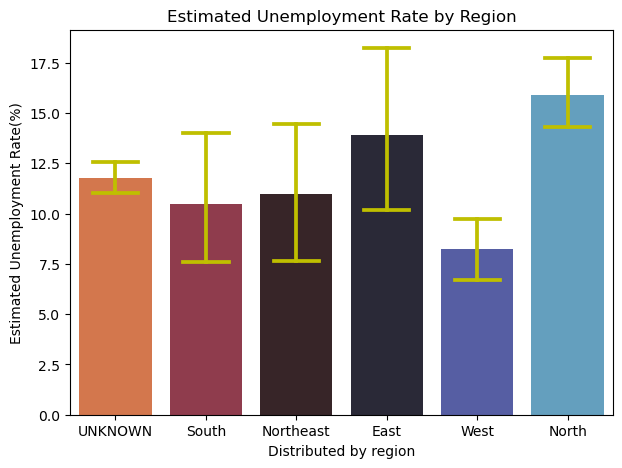

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(7,5))
sns.barplot(x = 'Region.1', y = 'Estimated Unemployment Rate (%)' , data = df,
            palette = "icefire_r",errcolor = 'y',capsize=0.5,
           alpha=1)
plt.xlabel('Distributed by region')
plt.ylabel('Estimated Unemployment Rate(%)')
plt.title('Estimated Unemployment Rate by Region')
plt.show()


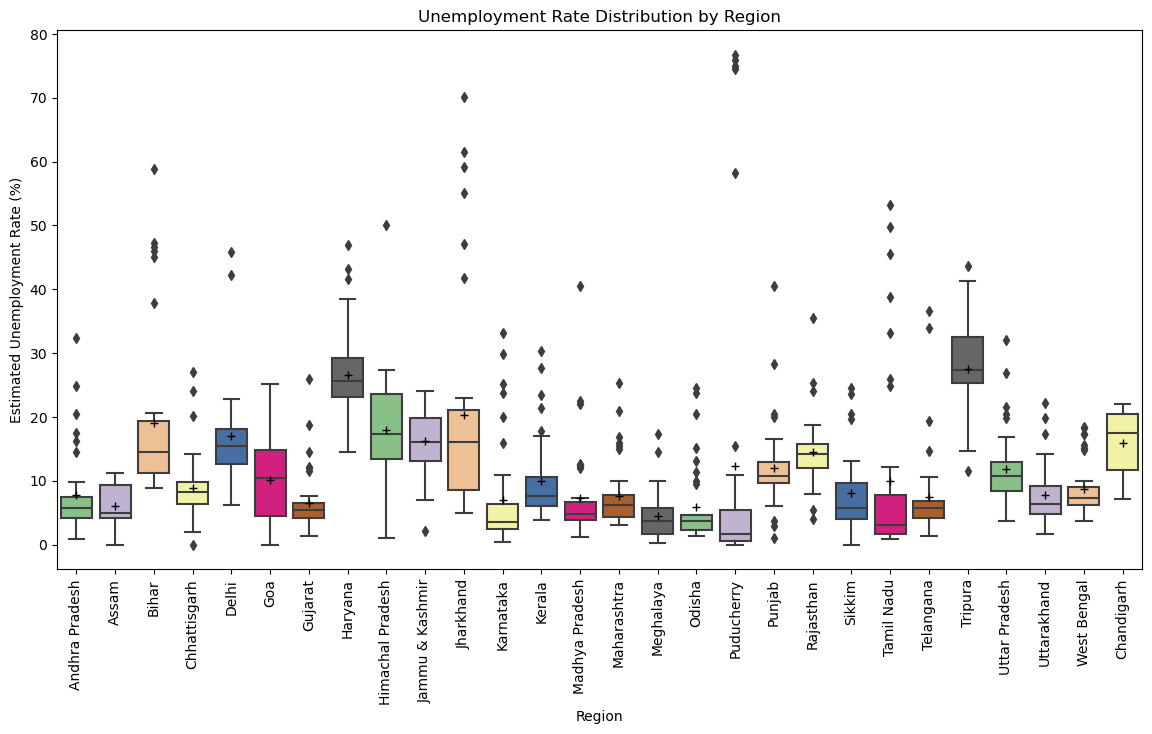

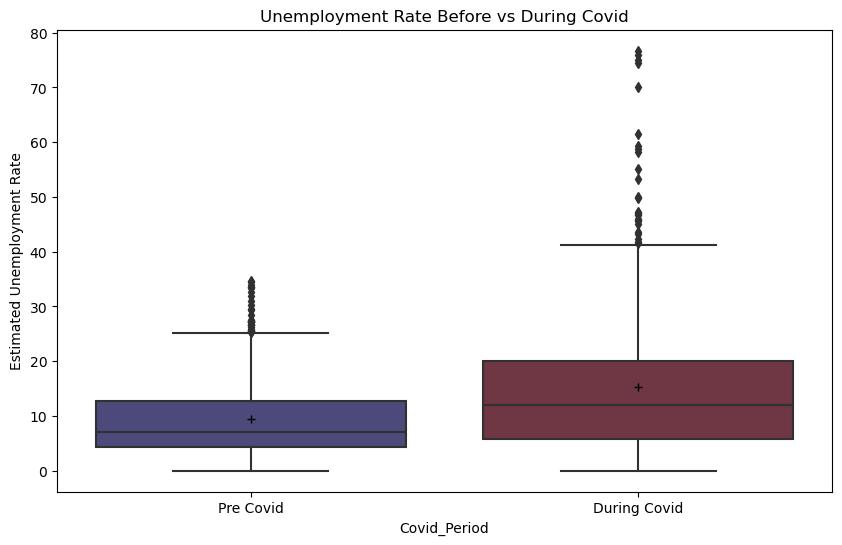

In [136]:
plt.figure(figsize=(14,7))
sns.boxplot(x="Region", y="Estimated Unemployment Rate (%)", data=df, showmeans = 'True',
            meanprops={'marker':'+','markeredgecolor':'black'},
           palette = 'Accent')
plt.xticks(rotation=90)
plt.title("Unemployment Rate Distribution by Region")
plt.show()

# Well,There is no specific Covid COLUMN, 
#So,according to Whole Nationwide lockdown start from March 2020  

import numpy as np
df["Covid_Period"] = np.where(df["Date"] >= "2020-03-01", "During Covid", "Pre Covid")
plt.figure(figsize=(10,6))
sns.boxplot(x="Covid_Period", y="Estimated Unemployment Rate (%)", data=df, palette = 'icefire',
             showmeans='True', meanprops={'marker':'+','markeredgecolor':'black'})
plt.title("Unemployment Rate Before vs During Covid")
plt.ylabel('Estimated Unemployment Rate')
plt.show()

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


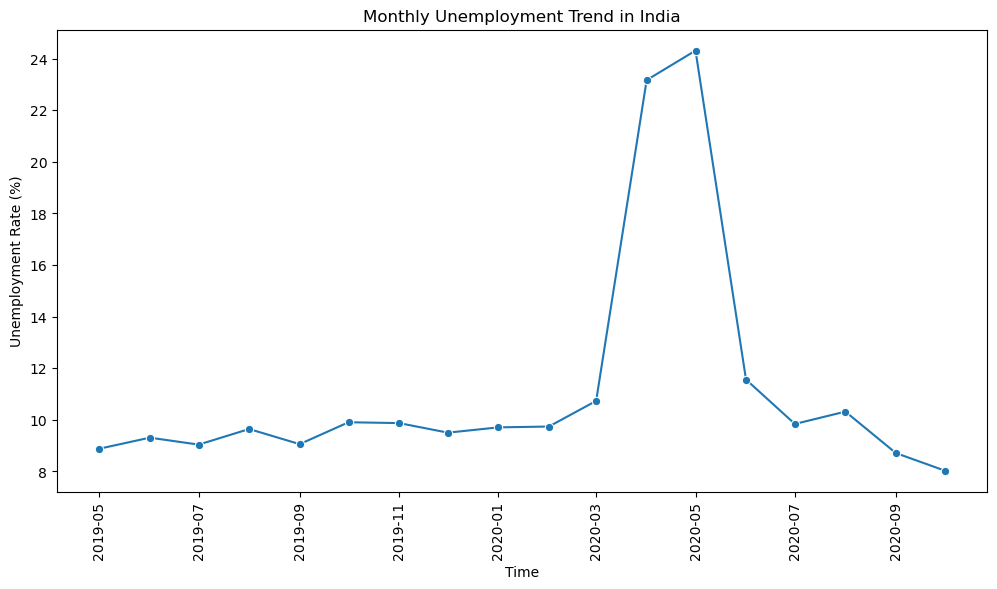

In [145]:
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

monthly_trend["Date"] = pd.to_datetime(monthly_trend[["Year","Month"]].assign(DAY=1))
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.lineplot(x="Date", y="Estimated Unemployment Rate (%)", data=monthly_trend, marker="o")
plt.title("Monthly Unemployment Trend in India")
plt.xlabel("Time")
plt.ylabel("Unemployment Rate (%)")
plt.show()